In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib as mp

mp.rcParams['figure.figsize']=(12,8)
mp.rcParams['axes.grid']=False


In [17]:
def parse(x):
    return datetime.strptime(x,'%Y-%m-%d')

In [18]:
df=pd.read_csv('rolling.csv',parse_dates=['datetime'],date_parser=parse)
df.head()

,Unnamed: 0,Unnamed: 0.1,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4,total,new
0,16,16,2007-01-01,2749.004,148.166,345785.73,11400.4,0,352,5880,39584.733275,62.32,14.441000
1,17,17,2007-01-02,1269.236,190.342,348399.04,5348.2,0,348,6562,14243.933346,69.10,14.525588
2,18,18,2007-01-03,1014.054,196.728,350722.21,4340.2,0,344,4765,11791.900019,51.09,13.675471
3,19,19,2007-01-04,3259.412,202.302,345240.43,13648.6,1051,7597,10896,34779.533289,195.44,13.783824
4,20,20,2007-01-05,2713.364,173.154,346313.90,11354.6,1483,379,7602,35758.733384,94.64,13.479471


In [19]:

def date_features(df, label=None):
    df = df.copy()

    df['datetime'] = df.datetime
    df['month'] = df['datetime'].dt.strftime('%B')
    df['year'] = df['datetime'].dt.strftime('%Y')
    df['dayofweek'] = df['datetime'].dt.strftime('%A')
    df['quarter'] = df['datetime'].dt.quarter
    df['dayofyear'] = df['datetime'].dt.dayofyear
    df['dayofmonth'] = df['datetime'].dt.day
    df['weekofyear'] = df['datetime'].dt.week
    
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X


In [23]:
X, y = date_features(df, label='new')
df_new = pd.concat([X, y], axis=1)
df_new.head()

<ipython-input-19-496019dd0300>:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['datetime'].dt.week


,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,new
0,Monday,1,January,2007,1,1,1,14.441000
1,Tuesday,1,January,2007,2,2,1,14.525588
2,Wednesday,1,January,2007,3,3,1,13.675471
3,Thursday,1,January,2007,4,4,1,13.783824
4,Friday,1,January,2007,5,5,1,13.479471


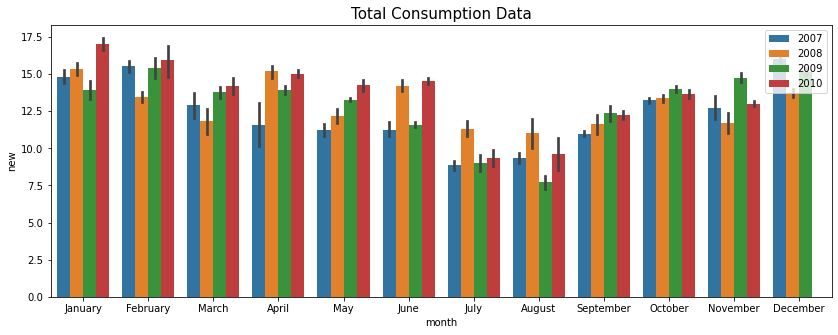

In [25]:
fig, ax = plt.subplots(figsize=(14,5))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="month", y="new",hue = 'year',data=df_new)
a.set_title("Total Consumption Data",fontsize=15)
plt.legend(loc='upper right')
plt.show()


Text(0.5, 1.0, 'Total Consumption By year')

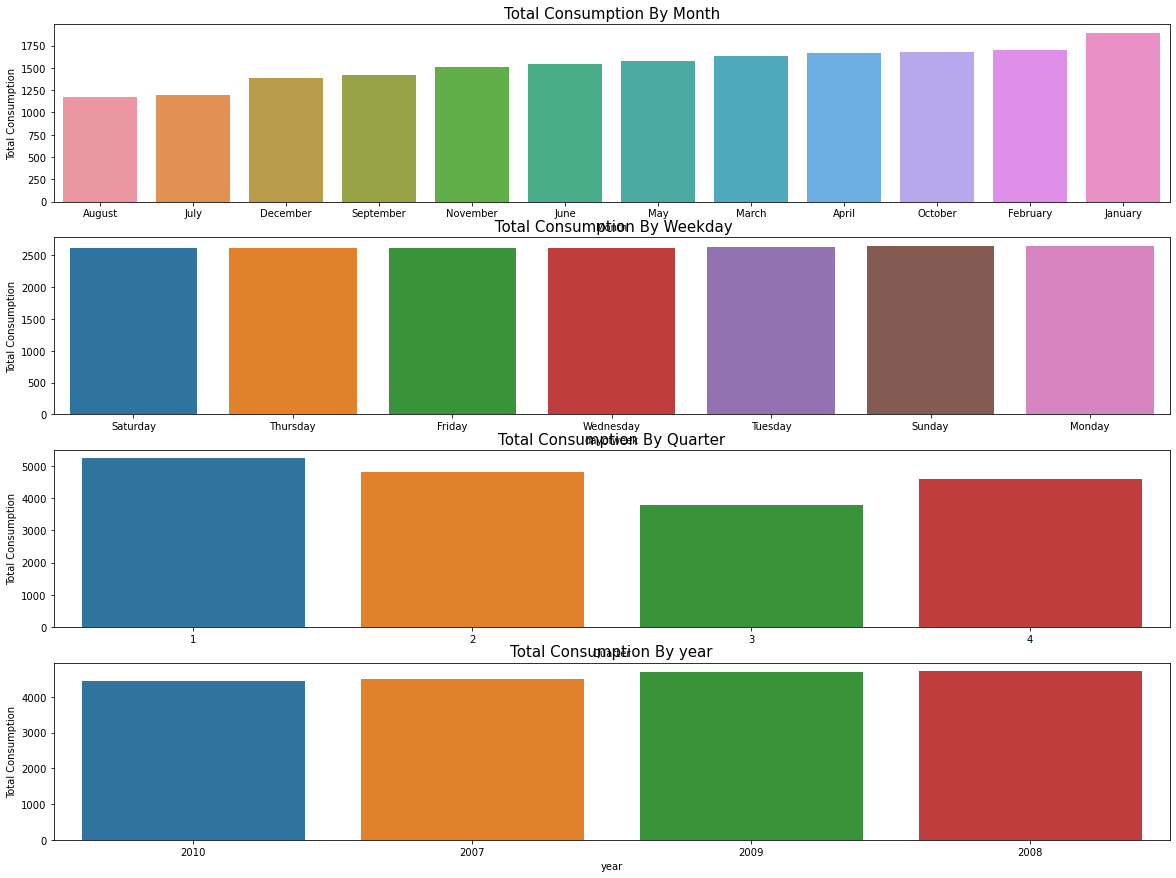

In [29]:

fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(20,15)

monthAggregated = pd.DataFrame(df_new.groupby("month")["new"].sum()).reset_index().sort_values('new')
sns.barplot(data=monthAggregated,x="month",y="new",ax=ax1)
ax1.set(xlabel='Month', ylabel='Total Consumption')
ax1.set_title("Total Consumption By Month",fontsize=15)

monthAggregated = pd.DataFrame(df_new.groupby("dayofweek")["new"].sum()).reset_index().sort_values('new')
sns.barplot(data=monthAggregated,x="dayofweek",y="new",ax=ax2)
ax2.set(xlabel='dayofweek', ylabel='Total Consumption')
ax2.set_title(" Total Consumption By Weekday",fontsize=15)

monthAggregated = pd.DataFrame(df_new.groupby("quarter")["new"].sum()).reset_index().sort_values('new')
sns.barplot(data=monthAggregated,x="quarter",y="new",ax=ax3)
ax3.set(xlabel='Quarter', ylabel='Total Consumption')
ax3.set_title("Total Consumption By Quarter",fontsize=15)

monthAggregated = pd.DataFrame(df_new.groupby("year")["new"].sum()).reset_index().sort_values('new')
sns.barplot(data=monthAggregated,x="year",y="new",ax=ax4)
ax4.set(xlabel='year', ylabel='Total Consumption')
ax4.set_title("Total Consumption By year",fontsize=15)